# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    Optimize: sma, percent band.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Define Optimizations

In [4]:
# pick one
optimize_sma  = True
optimize_band = False

# define SMAs ranges
if optimize_sma:
    Xs = range(50, 525, 25)
    Xs = [str(X) for X in Xs]

# define band ranges
elif optimize_band:
    Xs = range(0, 100, 5)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'sma' : 200,
    'band' : 0.0
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_sma:
        options['sma'] = int(X)
    elif optimize_band:
         options['band'] = int(X)/10
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500
annual_return_rate,6.25,5.87,6.18,6.32,6.14,6.52,6.52,6.63,6.46,6.23,5.98,6.18,6.06,6.00,5.43,5.12,4.88,5.11,4.56
max_closed_out_drawdown,-50.01,-46.25,-50.64,-45.25,-48.77,-47.00,-51.57,-59.84,-56.37,-53.04,-45.93,-47.76,-43.62,-42.98,-50.04,-47.60,-43.90,-43.39,-47.61
annualized_return_over_max_drawdown,0.12,0.13,0.12,0.14,0.13,0.14,0.13,0.11,0.11,0.12,0.13,0.13,0.14,0.14,0.11,0.11,0.11,0.12,0.10
drawdown_recovery_period,3719.00,1054.00,3675.00,3912.00,1268.00,549.00,1292.00,1051.00,1053.00,1184.00,1498.00,1524.00,1460.00,1457.00,1579.00,2053.00,2444.00,2439.00,3739.00
expected_shortfall,-4.40,-4.70,-4.21,-4.97,-4.88,-5.96,-6.40,-5.83,-7.53,-6.45,-4.81,-5.68,-5.74,-6.71,-8.88,-8.61,-9.02,-5.26,-6.15
best_month,55.78,50.91,44.29,34.27,29.99,27.02,27.01,35.96,35.96,33.32,27.01,27.01,27.02,22.41,22.41,22.40,22.42,22.42,22.42
worst_month,-24.71,-29.12,-21.23,-21.23,-24.41,-29.29,-26.88,-26.62,-31.52,-27.22,-31.46,-31.46,-31.46,-31.46,-31.45,-31.46,-31.44,-31.46,-31.46
sharpe_ratio,0.58,0.55,0.56,0.57,0.56,0.58,0.58,0.59,0.59,0.56,0.54,0.56,0.54,0.54,0.49,0.47,0.45,0.47,0.43
sortino_ratio,0.59,0.55,0.57,0.58,0.56,0.59,0.59,0.61,0.61,0.58,0.54,0.56,0.55,0.54,0.50,0.47,0.45,0.48,0.44
monthly_std,3.56,3.52,3.41,3.34,3.38,3.32,3.33,3.38,3.38,3.41,3.46,3.45,3.46,3.44,3.48,3.49,3.46,3.46,3.53


Bar graphs

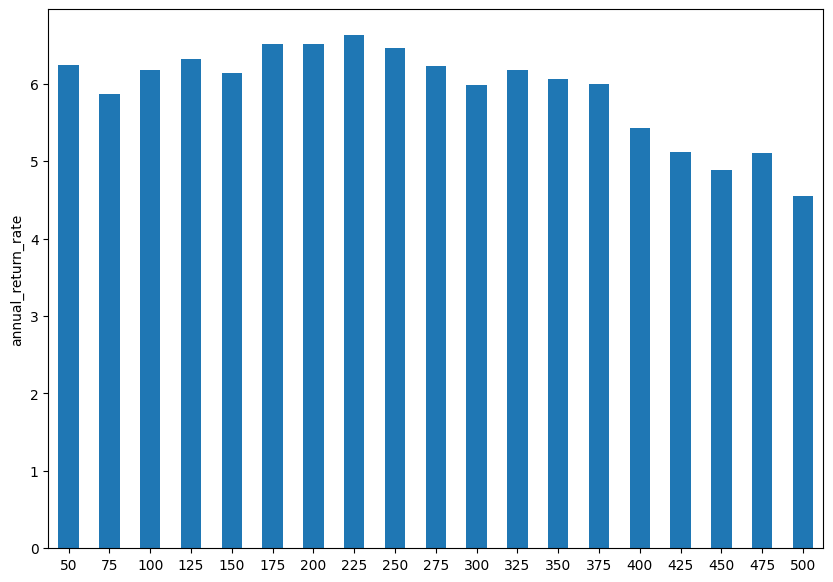

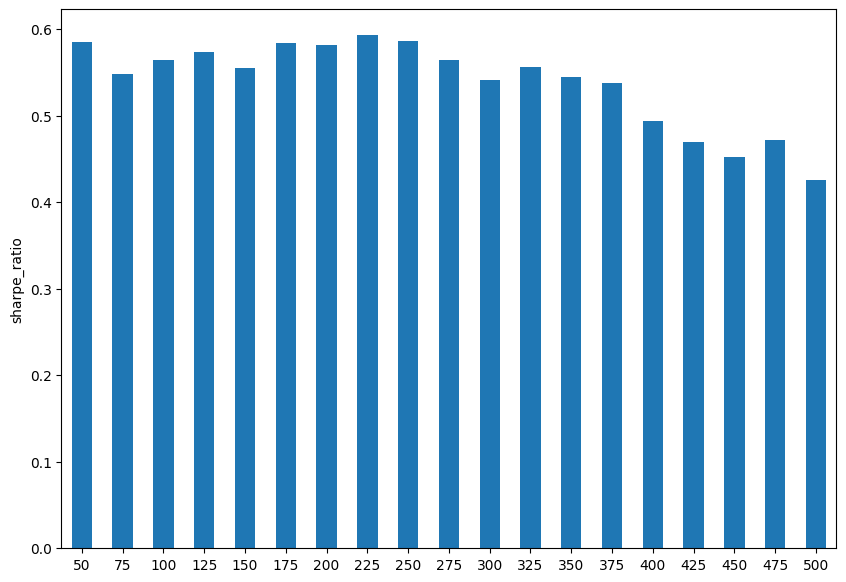

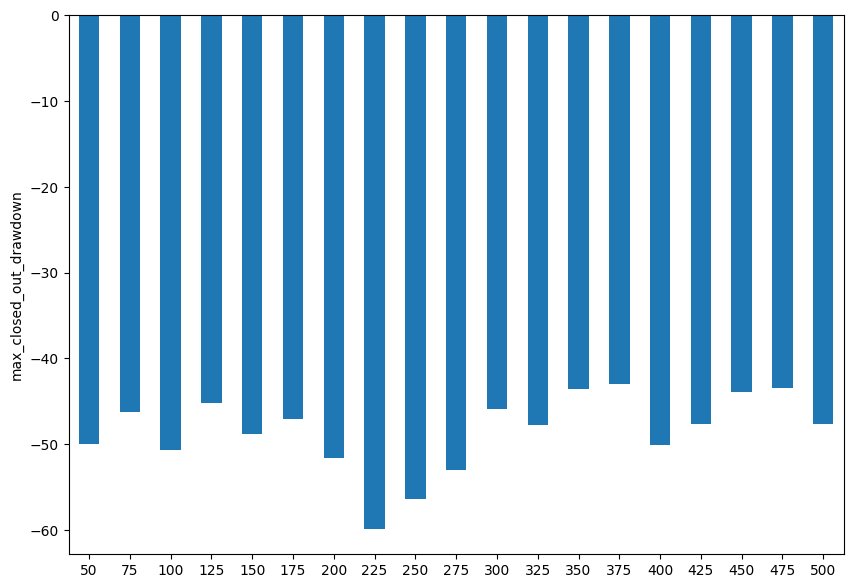

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

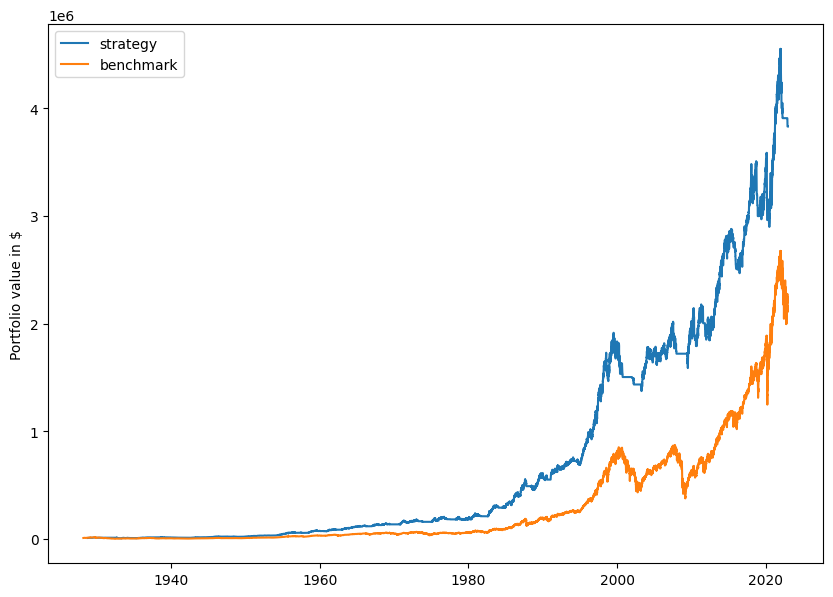

In [10]:
if optimize_sma :     Y = '200'
elif optimize_band:   Y = '30'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)